In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train),(X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [20]:
X_test[0].shape

(28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [31]:
X_test= X_test.reshape(-1,28,28,1)
X_test[0].shape

(28, 28, 1)

In [32]:
X_train= X_train.reshape(-1,28,28,1)
X_train[0].shape

(28, 28, 1)

In [11]:
y_test.shape

(10000,)

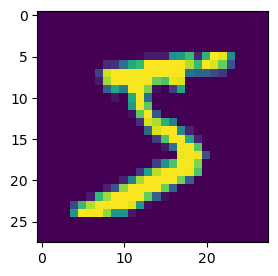

In [5]:
plt.figure(figsize=(15,3))
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

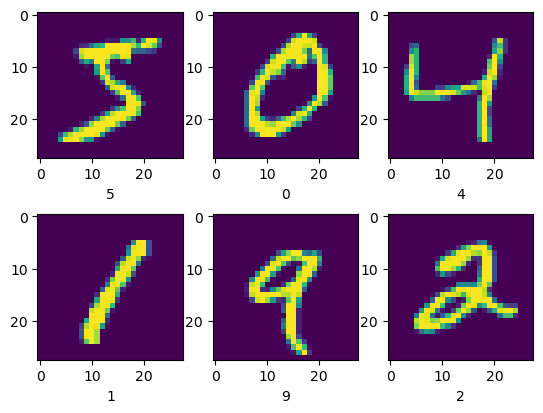

In [16]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
    plt.xlabel((y_train[i]))

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=10, kernel_size=(2,2), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(24,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [34]:
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [35]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2920 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1175 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0487 - accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9813


[0.06640452891588211, 0.9812999963760376]

In [37]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_pred

array([[1.2735692e-03, 7.8624031e-03, 3.9893895e-01, ..., 9.9999952e-01,
        2.0261605e-01, 8.7771297e-01],
       [3.0743357e-02, 9.8622453e-01, 1.0000000e+00, ..., 1.1448441e-09,
        4.0169817e-01, 1.8746054e-04],
       [8.1434891e-02, 9.9999177e-01, 2.3800892e-01, ..., 9.0207112e-01,
        2.8366289e-01, 7.7317737e-02],
       ...,
       [1.7486834e-04, 5.4851494e-05, 1.8607137e-05, ..., 2.2435686e-01,
        2.8583539e-01, 9.7697085e-01],
       [1.1240405e-02, 1.9882453e-05, 5.5902981e-04, ..., 1.7643126e-02,
        9.9963439e-01, 5.7749879e-03],
       [9.6920431e-01, 2.3728749e-03, 8.9369702e-01, ..., 3.0085745e-09,
        3.9432002e-03, 1.1837637e-02]], dtype=float32)

Text(0.5, 0, '5')

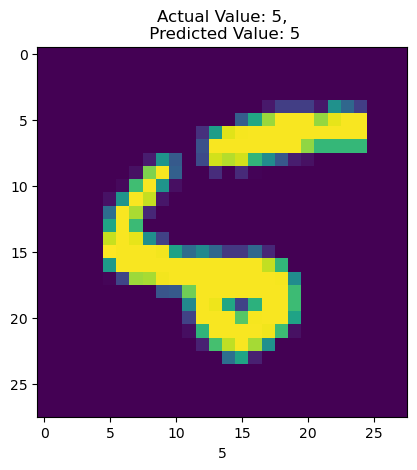

In [63]:
k=8
plt.imshow(X_test[k])
plt.title(f"Actual Value: {y_test[k]},\n Predicted Value: {np.argmax(y_pred[k])}")
plt.xlabel(y_test[k])